In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [34]:
house = pd.read_csv('data.csv', encoding='UTF-16', delimiter='\t')

In [35]:
house.columns

Index(['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Inventory', 'Inventory MoM ', 'Supply'],
      dtype='object')

In [37]:
# Convert the 'Month of Period End' column to datetime format (if not already)
house['Month of Period End'] = pd.to_datetime(house['Month of Period End'], format='%y-%b')

# Reformat the datetime column to the desired format "M/YYYY"
house['Month of Period End'] = house['Month of Period End'].dt.strftime('%-m/%Y') 

# Remove $ and commas, change K to 000, convert to integer
house['Median Sale Price'] = house['Median Sale Price'].str.replace('$','').str.replace('K','000').str.replace(',','').astype(int)

# Remove commas and convert to integer
house['Inventory'] = house['Inventory'].str.replace(',','').astype(int)

#Convert to float
house['Supply'] = house['Supply'].astype(float)

house

<ipython-input-37-65bcc57f5f09>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  house['Median Sale Price'] = house['Median Sale Price'].str.replace('$','').str.replace('K','000').str.replace(',','').astype(int)


,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-13.40%,2855,-1.60%,4.2
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-2.20%,2955,3.50%,3.7
2,"Atlanta, GA",2018-03-01 00:00:00,267000,8.80%,3073,4.00%,2.8
3,"Atlanta, GA",2018-04-01 00:00:00,279000,4.70%,3198,4.10%,3.2
4,"Atlanta, GA",2018-05-01 00:00:00,295000,5.50%,3346,4.60%,2.7
...,...,...,...,...,...,...,...
403,"St. Charles, MO",2023-04-01 00:00:00,330000,0.90%,69,-15.90%,0.8
404,"St. Charles, MO",2023-05-01 00:00:00,338000,2.30%,79,14.50%,0.8
405,"St. Charles, MO",2023-06-01 00:00:00,335000,-0.70%,111,40.50%,0.9
406,"St. Charles, MO",2023-07-01 00:00:00,327000,-2.50%,109,-1.80%,0.9


# House Price

In [38]:
# Isolating pre-COVID and post-COVID data for Home Prices and Inventory
pre_covid_home_data = house[house['Month of Period End'].str.contains('18|19')]
post_covid_home_data = house[house['Month of Period End'].str.contains('20|21|22|23')]

# Calculate median sale price statistics for pre-COVID and post-COVID periods for each region
pre_covid_home_stats = pre_covid_home_data.groupby('Region')['Median Sale Price'].describe()
post_covid_home_stats = post_covid_home_data.groupby('Region')['Median Sale Price'].describe()

# Combining the statistics for a comparative view
home_price_comparison = pd.concat([pre_covid_home_stats, post_covid_home_stats], axis=1, keys=['Pre-COVID', 'Post-COVID'])
home_price_comparison[['Pre-COVID', 'Post-COVID']].swaplevel(axis=1).sort_index(axis=1)

25%                  50%                  75%  \
                Post-COVID Pre-COVID Post-COVID Pre-COVID Post-COVID   
Region                                                                 
Atlanta, GA       299750.0  279750.0   350000.0  291000.0   391500.0   
Lakeville, MN     374500.0  349750.0   407000.0  363500.0   455000.0   
Marietta, GA      300500.0  276500.0   332500.0  295000.0   388250.0   
Minneapolis, MN   280000.0  269500.0   305000.0  275500.0   331250.0   
St. Charles, MO   231000.0  217500.0   253500.0  224500.0   296250.0   
St. Louis, MO     162750.0  149750.0   190000.0  161000.0   202000.0   

                               count                  max            \
                Pre-COVID Post-COVID Pre-COVID Post-COVID Pre-COVID   
Region                                                                
Atlanta, GA      314250.0       68.0      24.0   458000.0  338000.0   
Lakeville, MN    375500.0       68.0      24.0   523000.0  395000.0   
Marietta, GA     304250.0       68.0      24.0   470000.0  325000.0   
Minneapolis, MN  286250.0       68.0      24.0   361000.0  305000.0   
St. Charles, MO  235000.0       68.0      24.0   340000.0  248000.0   
St. Louis, MO    165250.0       68.0      24.0   250000.0  185000.0   

                          mean                       min            \
                    Post-COVID      Pre-COVID Post-COVID Pre-COVID   
Region                                                               
Atlanta, GA      348176.470588  293625.000000   246000.0  246000.0   
Lakeville, MN    415779.411765  361416.666667   330000.0  330000.0   
Marietta, GA     347264.705882  291333.333333   256000.0  256000.0   
Minneapolis, MN  306794.117647  277000.000000   244000.0  244000.0   
St. Charles, MO  263102.941176  223916.666667   186000.0  186000.0   
St. Louis, MO    185632.352941  159666.666667   139000.0  139000.0   

                          std                
                   Post-COVID     Pre-COVID  
Region                                       
Atlanta, GA      52398.285598  24897.725581  
Lakeville, MN    53765.062614  19010.104102  
Marietta, GA     58180.526477  18064.297401  
Minneapolis, MN  29145.829339  15004.347196  
St. Charles, MO  39889.451606  15070.606770  
St. Louis, MO    26760.911800  11615.831276

From these comparisons, it's evident that median home sale prices have generally increased across all regions post-COVID-19

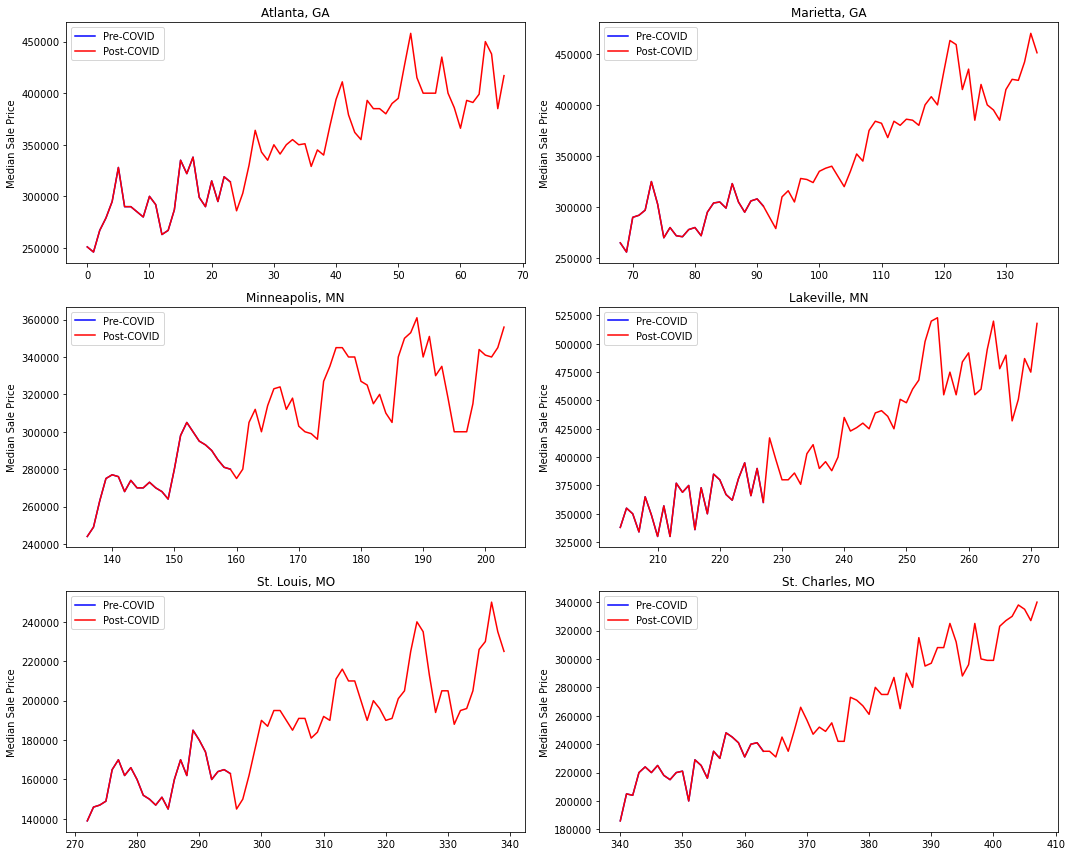

In [39]:
# Visualization for Home Prices comparison
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

regions = house['Region'].unique()
for i, region in enumerate(regions):
    ax = axs.flatten()[i]
    pre_covid_home_data[pre_covid_home_data['Region'] == region]['Median Sale Price'].plot(ax=ax, label='Pre-COVID', color='blue')
    post_covid_home_data[post_covid_home_data['Region'] == region]['Median Sale Price'].plot(ax=ax, label='Post-COVID', color='red')
    ax.set_title(region)
    ax.set_ylabel('Median Sale Price')
    ax.legend()

plt.tight_layout()
plt.show()

# Inventory

In [40]:
# Calculate median sale price statistics for pre-COVID and post-COVID periods for each region
pre_covid_inventory_stats = pre_covid_home_data.groupby('Region')['Inventory'].describe()
post_covid_inventory_stats = post_covid_home_data.groupby('Region')['Inventory'].describe()

# Combining the statistics for a comparative view
home_price_comparison = pd.concat([pre_covid_inventory_stats, post_covid_inventory_stats], axis=1, keys=['Pre-COVID', 'Post-COVID'])
home_price_comparison[['Pre-COVID', 'Post-COVID']].swaplevel(axis=1).sort_index(axis=1)

25%                  50%                  75%  \
                Post-COVID Pre-COVID Post-COVID Pre-COVID Post-COVID   
Region                                                                 
Atlanta, GA        2846.25   3641.00     3321.0    4144.0    4311.50   
Lakeville, MN       177.75    236.00      227.0     252.5     253.75   
Marietta, GA        217.00    448.00      325.5     493.0     453.00   
Minneapolis, MN     865.00    881.50     1095.0    1161.0    1322.50   
St. Charles, MO      83.75    199.75      117.5     226.0     201.25   
St. Louis, MO       870.25   1375.75     1042.0    1432.5    1381.25   

                               count                  max            \
                Pre-COVID Post-COVID Pre-COVID Post-COVID Pre-COVID   
Region                                                                
Atlanta, GA       4747.00       68.0      24.0     5212.0    5212.0   
Lakeville, MN      283.00       68.0      24.0      334.0     334.0   
Marietta, GA       529.75       68.0      24.0      553.0     553.0   
Minneapolis, MN   1327.50       68.0      24.0     1709.0    1471.0   
St. Charles, MO    283.00       68.0      24.0      314.0     314.0   
St. Louis, MO     1659.50       68.0      24.0     1830.0    1830.0   

                        mean                     min                   std  \
                  Post-COVID    Pre-COVID Post-COVID Pre-COVID  Post-COVID   
Region                                                                       
Atlanta, GA      3528.411765  4126.708333     1867.0    2855.0  886.051113   
Lakeville, MN     216.220588   256.541667      108.0     178.0   56.347760   
Marietta, GA      340.970588   485.208333      125.0     379.0  132.875092   
Minneapolis, MN  1104.882353  1116.875000      654.0     654.0  266.706867   
St. Charles, MO   146.558824   238.916667       40.0     144.0   79.237294   
St. Louis, MO    1104.176471  1480.916667      622.0    1034.0  326.833790   

                             
                  Pre-COVID  
Region                       
Atlanta, GA      730.464622  
Lakeville, MN     36.377226  
Marietta, GA      51.941421  
Minneapolis, MN  254.716605  
St. Charles, MO   50.046862  
St. Louis, MO    206.079326

While some regions like Atlanta, GA, and Minneapolis, MN, have seen an increase in inventory post-COVID-19, others like Kirkwood, MO, and St. Louis, MO, have seen a decrease.

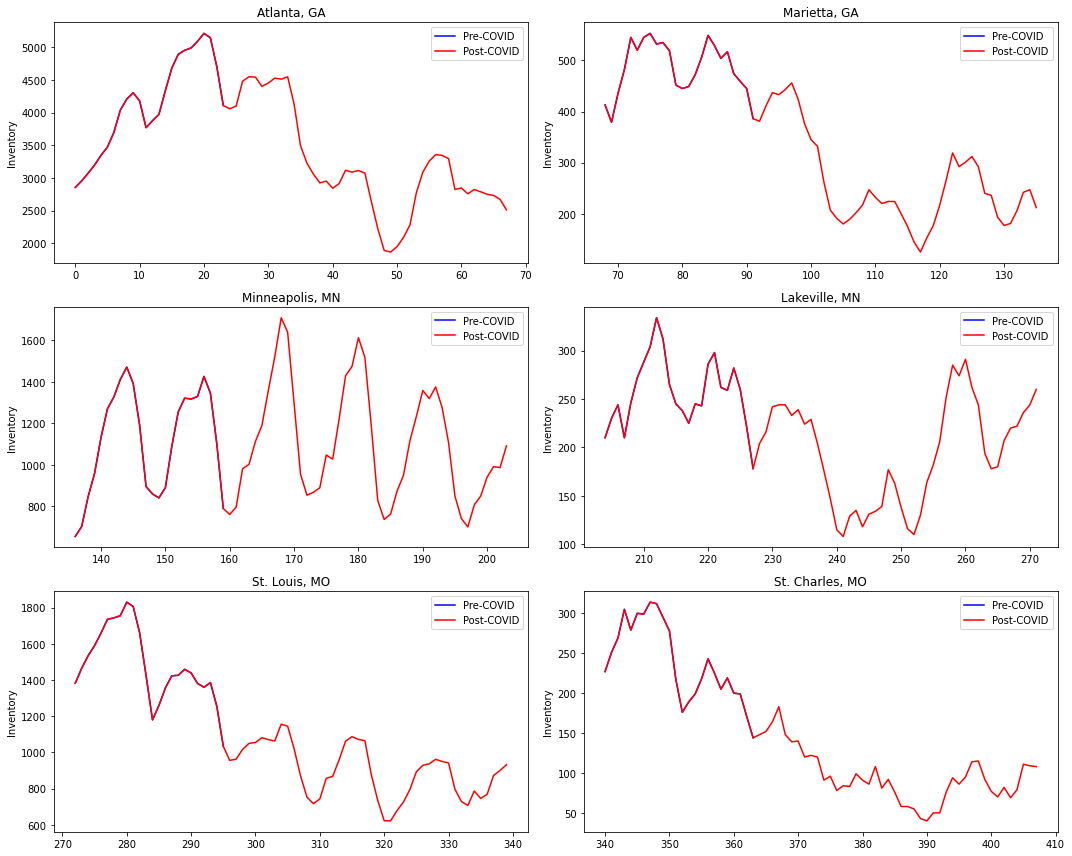

In [41]:
#Visualization for Inventory comparison
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, region in enumerate(regions):
    ax = axs.flatten()[i]
    pre_covid_home_data[pre_covid_home_data['Region'] == region]['Inventory'].plot(ax=ax, label='Pre-COVID', color='blue')
    post_covid_home_data[post_covid_home_data['Region'] == region]['Inventory'].plot(ax=ax, label='Post-COVID', color='red')
    ax.set_title(region)
    ax.set_ylabel('Inventory')
    ax.legend()

plt.tight_layout()
plt.show()

# Supply

In [42]:
# Calculate median sale price statistics for pre-COVID and post-COVID periods for each region
pre_covid_supply_stats = pre_covid_home_data.groupby('Region')['Supply'].describe()
post_covid_supply_stats = post_covid_home_data.groupby('Region')['Supply'].describe()

# Combining the statistics for a comparative view
home_price_comparison = pd.concat([pre_covid_supply_stats, post_covid_supply_stats], axis=1, keys=['Pre-COVID', 'Post-COVID'])
home_price_comparison[['Pre-COVID', 'Post-COVID']].swaplevel(axis=1).sort_index(axis=1)

25%                  50%                  75%  \
                Post-COVID Pre-COVID Post-COVID Pre-COVID Post-COVID   
Region                                                                 
Atlanta, GA          2.900     3.850       3.85      4.55      4.800   
Lakeville, MN        1.400     1.950       2.00      2.35      2.500   
Marietta, GA         1.375     2.375       2.20      2.85      2.925   
Minneapolis, MN      1.575     1.575       1.70      1.65      1.900   
St. Charles, MO      0.700     1.600       0.90      2.00      1.800   
St. Louis, MO        1.675     2.600       2.00      3.00      2.725   

                               count                  max            \
                Pre-COVID Post-COVID Pre-COVID Post-COVID Pre-COVID   
Region                                                                
Atlanta, GA         5.000       68.0      24.0        6.8       6.8   
Lakeville, MN       2.625       68.0      24.0        4.2       4.2   
Marietta, GA        3.100       68.0      24.0        3.9       3.9   
Minneapolis, MN     1.925       68.0      24.0        2.5       2.2   
St. Charles, MO     2.225       68.0      24.0        3.4       3.4   
St. Louis, MO       3.525       68.0      24.0        4.3       4.3   

                      mean                  min                  std            
                Post-COVID Pre-COVID Post-COVID Pre-COVID Post-COVID Pre-COVID  
Region                                                                          
Atlanta, GA       3.957353  4.483333        1.6       2.7   1.277745  1.029845  
Lakeville, MN     1.998529  2.429167        0.6       1.6   0.785217  0.717168  
Marietta, GA      2.144118  2.862500        0.9       2.2   0.869102  0.501140  
Minneapolis, MN   1.723529  1.737500        1.1       1.4   0.300804  0.239224  
St. Charles, MO   1.261765  2.020833        0.4       1.3   0.713417  0.537287  
St. Louis, MO     2.258824  3.100000        1.3       2.2   0.776951  0.594175

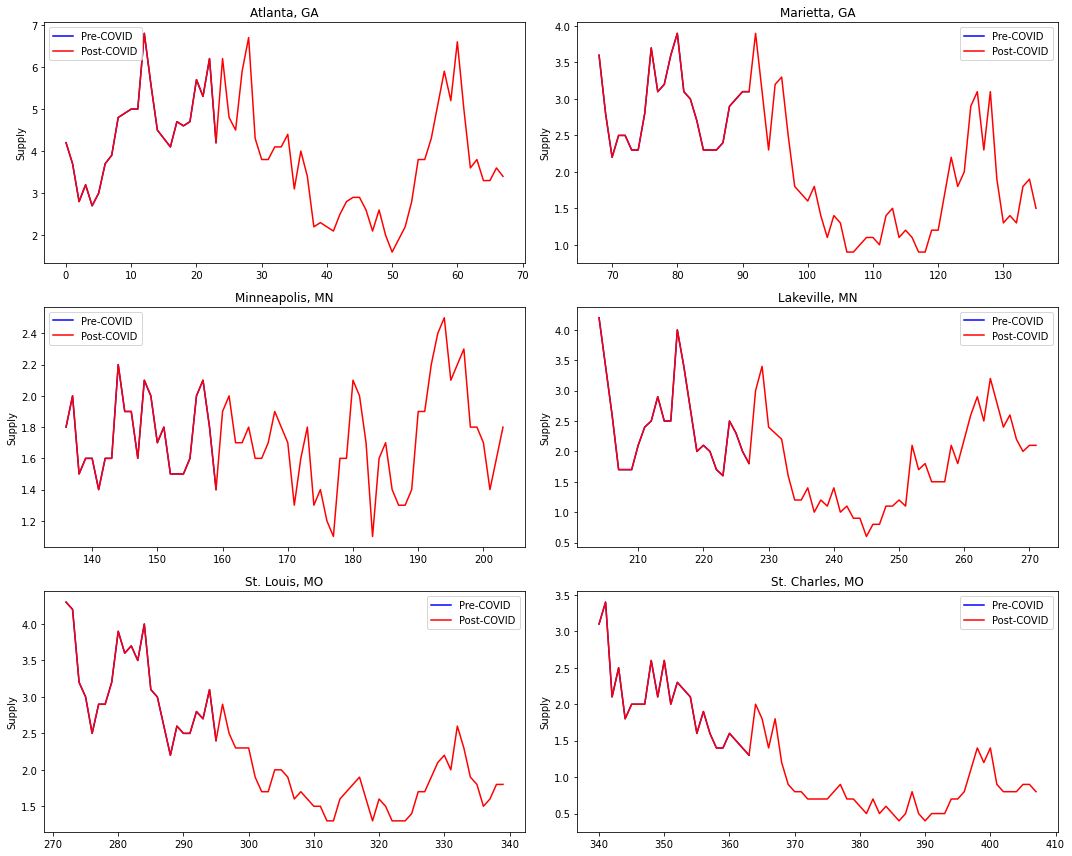

In [43]:
#Visualization for Inventory comparison
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, region in enumerate(regions):
    ax = axs.flatten()[i]
    pre_covid_home_data[pre_covid_home_data['Region'] == region]['Supply'].plot(ax=ax, label='Pre-COVID', color='blue')
    post_covid_home_data[post_covid_home_data['Region'] == region]['Supply'].plot(ax=ax, label='Post-COVID', color='red')
    ax.set_title(region)
    ax.set_ylabel('Supply')
    ax.legend()

plt.tight_layout()
plt.show()

# Interested Rate

In [19]:
interest_rate_df = pd.read_csv('Monthly Interested Rate.csv')

In [20]:
# Isolating pre-COVID and post-COVID data for Interest Rate
pre_covid_interest_rate_data = interest_rate_df[interest_rate_df['DATE'].str.contains('2018|2019')]
post_covid_interest_rate_data = interest_rate_df[interest_rate_df['DATE'].str.contains('2020|2021|2022|2023')]

# Calculate interest rate statistics for pre-COVID and post-COVID periods
pre_covid_interest_rate_stats = pre_covid_interest_rate_data['MORTGAGE30US'].describe()
post_covid_interest_rate_stats = post_covid_interest_rate_data['MORTGAGE30US'].describe()

# Combining the statistics for a comparative view
interest_rate_comparison = pd.concat([pre_covid_interest_rate_stats, post_covid_interest_rate_stats], axis=1)
interest_rate_comparison.columns = ['Pre-COVID', 'Post-COVID']

interest_rate_comparison

,Pre-COVID,Post-COVID
count,24,46
unique,24,45
top,4.57,3.0675
freq,1,2


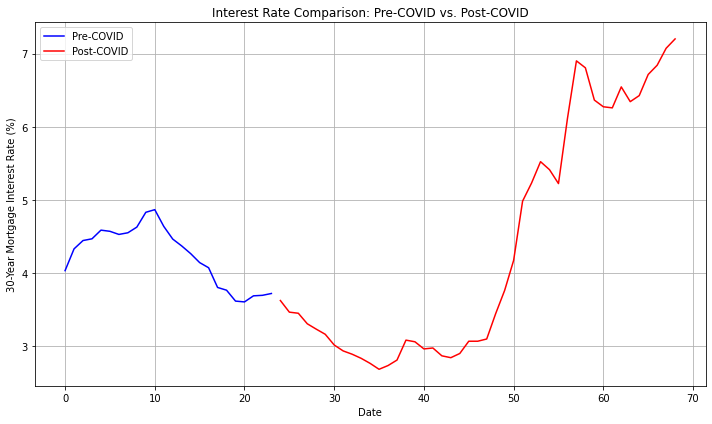

In [47]:
# Convert the 'MORTGAGE30US' column to numeric values and handle the "." placeholder
interest_rate_df['MORTGAGE30US'] = pd.to_numeric(interest_rate_df['MORTGAGE30US'], errors='coerce')

# Re-isolating pre-COVID and post-COVID data after conversion
pre_covid_interest_rate_data = interest_rate_df[interest_rate_df['DATE'].str.contains('2018|2019')]
post_covid_interest_rate_data = interest_rate_df[interest_rate_df['DATE'].str.contains('2020|2021|2022|2023')]

# Visualization for Interest Rate comparison
plt.figure(figsize=(10, 6))

pre_covid_interest_rate_data['MORTGAGE30US'].plot(label='Pre-COVID', color='blue')
post_covid_interest_rate_data['MORTGAGE30US'].plot(label='Post-COVID', color='red')

plt.title("Interest Rate Comparison: Pre-COVID vs. Post-COVID")
plt.ylabel("30-Year Mortgage Interest Rate (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interest rates were relatively higher during the pre-COVID period.
Post-COVID, there's a noticeable drop in interest rates, which then starts to climb upwards again towards 2023.

# Labor Construction 

In [7]:
labor_df = pd.read_csv('Labor Construction.csv')

In [8]:
# Removing rows with NaN values in the 'DATE' column
labor_df = labor_df.dropna(subset=['DATE'])

In [9]:
# Isolating pre-COVID and post-COVID data for Labor Construction
pre_covid_labor_data = labor_df[labor_df['DATE'].str.contains('2018|2019')]
post_covid_labor_data = labor_df[labor_df['DATE'].str.contains('2020|2021|2022|2023')]

# Calculate labor construction statistics for pre-COVID and post-COVID periods
pre_covid_labor_stats = pre_covid_labor_data['Total Construction Spend'].describe()
post_covid_labor_stats = post_covid_labor_data['Total Construction Spend'].describe()

# Combining the statistics for a comparative view
labor_comparison = pd.concat([pre_covid_labor_stats, post_covid_labor_stats], axis=1)
labor_comparison.columns = ['Pre-COVID', 'Post-COVID']

labor_comparison

,Pre-COVID,Post-COVID
count,24.000000,44.000000
mean,558670.875000,806573.954545
std,23240.738801,116378.255502
min,522840.000000,592258.000000
25%,540624.250000,729226.250000
50%,562843.500000,836636.000000
75%,577963.500000,887773.500000
max,594372.000000,979044.000000


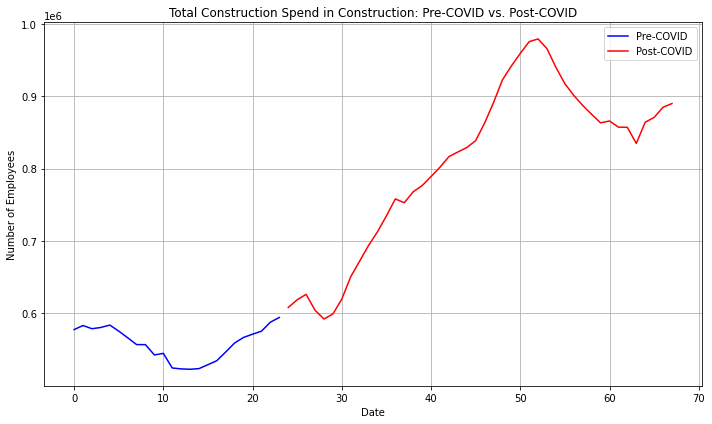

In [10]:
# Visualization for Labor Construction comparison (Number of Employees)
plt.figure(figsize=(10, 6))

pre_covid_labor_data['Total Construction Spend'].plot(label='Pre-COVID', color='blue')
post_covid_labor_data['Total Construction Spend'].plot(label='Post-COVID', color='red')

plt.title("Total Construction Spend in Construction: Pre-COVID vs. Post-COVID")
plt.ylabel("Number of Employees")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the statistics, we observe a significant increase in the total construction spend post-COVID-19 compared to the pre-COVID period.

In [28]:
# Calculate Employee statistics for pre-COVID and post-COVID periods
pre_covid_employee_stats = pre_covid_labor_data['Employee'].describe()
post_covid_employee_stats = post_covid_labor_data['Employee'].describe()

# Combining the statistics for a comparative view
employee_comparison = pd.concat([pre_covid_employee_stats, post_covid_employee_stats], axis=1)
employee_comparison.columns = ['Pre-COVID', 'Post-COVID']

employee_comparison

,Pre-COVID,Post-COVID
count,24.000000,44.000000
mean,809.079167,877.150000
std,14.224290,53.415904
min,776.700000,708.400000
25%,802.175000,837.500000
50%,811.600000,886.000000
75%,817.050000,924.725000
max,830.700000,935.800000


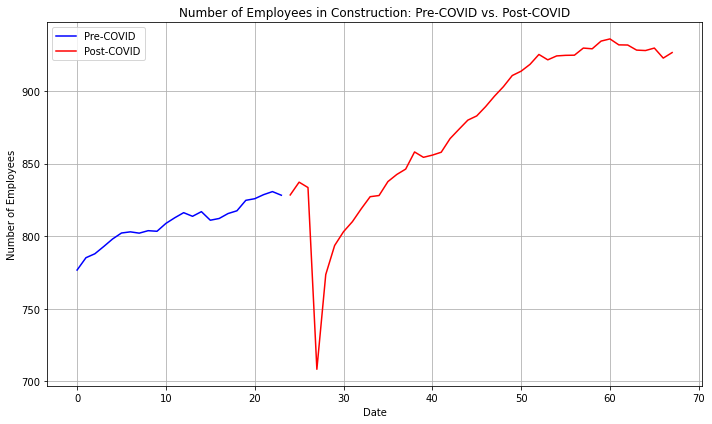

In [48]:
# Visualization for Labor Construction comparison (Number of Employees)
plt.figure(figsize=(10, 6))

pre_covid_labor_data['Employee'].plot(label='Pre-COVID', color='blue')
post_covid_labor_data['Employee'].plot(label='Post-COVID', color='red')

plt.title("Number of Employees in Construction: Pre-COVID vs. Post-COVID")
plt.ylabel("Number of Employees")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A slight dip in the number of employees in construction around early 2020, which corresponds to the initial outbreak of COVID-19.
Post this dip, there is a steady upward trend indicating a recovery and subsequent increase in the number of employees in construction post-COVID.

# Population

In [65]:
population_df = pd.read_csv("Population.csv")

In [66]:
population_df

,Region,City Type,City Name,Year,Population,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,North,Metropolitan,"Minneapolis, MN",2018,424310,NaN,NaN,NaN
1,North,Metropolitan,"Minneapolis, MN",2019,428821,NaN,NaN,NaN
2,North,Metropolitan,"Minneapolis, MN",2020,"429,985",NaN,NaN,NaN
3,North,Metropolitan,"Minneapolis, MN",2021,"424,635",NaN,NaN,NaN
4,North,Metropolitan,"Minneapolis, MN",2022,"425,096",NaN,NaN,NaN
5,North,Suburban,"Lakeville, MN",2018,65840,NaN,NaN,NaN
6,North,Suburban,"Lakeville, MN",2019,67384,NaN,NaN,NaN
7,North,Suburban,"Lakeville, MN",2020,"70,175",NaN,NaN,NaN
8,North,Suburban,"Lakeville, MN",2021,"72,751",NaN,NaN,NaN
9,North,Suburban,"Lakeville, MN",2022,"74,553",NaN,NaN,NaN


In [67]:
# Remove commas and convert to integer
population_df['Population'] = population_df['Population'].str.replace(',','').astype(int)

In [74]:
# Remove columns
population_df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], inplace = True)

In [82]:
population_df.dtypes

Region        object
City Type     object
City Name     object
Year           int64
Population     int32
dtype: object

In [84]:
population_df['Year'] = population_df['Year'].astype(str)

In [85]:
# Isolating pre-COVID and post-COVID data for Home Prices and Inventory
pre_covid_population_data = population_df[population_df['Year'].str.contains('18|19')]
post_covid_population_data = population_df[population_df['Year'].str.contains('20|21|22|23')]

# Calculate median sale price statistics for pre-COVID and post-COVID periods for each region
pre_covid_population_stats = pre_covid_population_data.groupby('City Name')['Population'].describe()
post_covid_population_stats = post_covid_population_data.groupby('City Name')['Population'].describe()

# Combining the statistics for a comparative view
population_comparison = pd.concat([pre_covid_population_stats, post_covid_population_stats], axis=1, keys=['Pre-COVID', 'Post-COVID'])
population_comparison[['Pre-COVID', 'Post-COVID']].swaplevel(axis=1).sort_index(axis=1)

25%                   50%                  75%  \
                Post-COVID  Pre-COVID Post-COVID Pre-COVID Post-COVID   
City Name                                                               
Atlanta, GA       498722.0  500904.25   498772.0  503036.5   499127.0   
Lakeville, MN      67384.0   66226.00    70175.0   66612.0    72751.0   
Marietta, GA       60602.0   60653.25    60807.0   60704.5    61052.0   
Minneapolis, MN   424635.0  425437.75   425096.0  426565.5   428821.0   
St. Louis, MO     293562.0  301580.50   300887.0  302274.0   301574.0   
St.Charles, MO     70777.0   70820.50    70951.0   70864.0    71048.0   

                                count                  max            \
                 Pre-COVID Post-COVID Pre-COVID Post-COVID Pre-COVID   
City Name                                                              
Atlanta, GA      505168.75        5.0       2.0   507301.0  507301.0   
Lakeville, MN     66998.00        5.0       2.0    74553.0   67384.0   
Marietta, GA      60755.75        5.0       2.0    62602.0   60807.0   
Minneapolis, MN  427693.25        5.0       2.0   429985.0  428821.0   
St. Louis, MO    302967.50        5.0       2.0   303661.0  303661.0   
St.Charles, MO    70907.50        5.0       2.0    71184.0   70951.0   

                      mean                  min                    std  \
                Post-COVID Pre-COVID Post-COVID Pre-COVID   Post-COVID   
City Name                                                                
Atlanta, GA       499317.8  503036.5   492667.0  498772.0  5211.859140   
Lakeville, MN      70140.6   66612.0    65840.0   65840.0  3618.654764   
Marietta, GA       61012.2   60704.5    59998.0   60602.0   970.569524   
Minneapolis, MN   426569.4  426565.5   424310.0  424310.0  2634.090222   
St. Louis, MO     297252.4  302274.0   286578.0  300887.0  7080.228902   
St.Charles, MO     70904.4   70864.0    70562.0   70777.0   242.093577   

                              
                   Pre-COVID  
City Name                     
Atlanta, GA      6030.913737  
Lakeville, MN    1091.772870  
Marietta, GA      144.956890  
Minneapolis, MN  3189.758690  
St. Louis, MO    1961.514211  
St.Charles, MO    123.036580

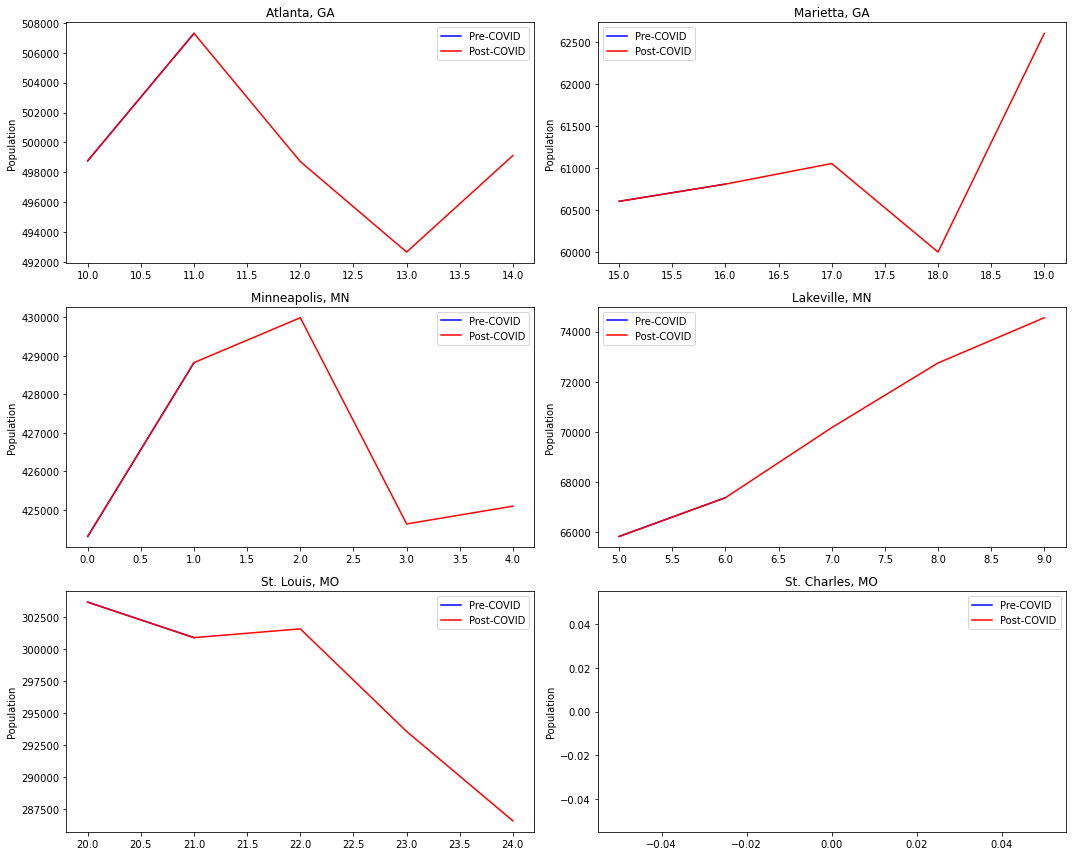

In [87]:
#Visualization for Population comparison
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, region in enumerate(regions):
    ax = axs.flatten()[i]
    pre_covid_population_data[pre_covid_population_data['City Name'] == region]['Population'].plot(ax=ax, label='Pre-COVID', color='blue')
    post_covid_population_data[post_covid_population_data['City Name'] == region]['Population'].plot(ax=ax, label='Post-COVID', color='red')
    ax.set_title(region)
    ax.set_ylabel('Population')
    ax.legend()

plt.tight_layout()
plt.show()

# Comparisons Between Metropolitan and Suburban Areas

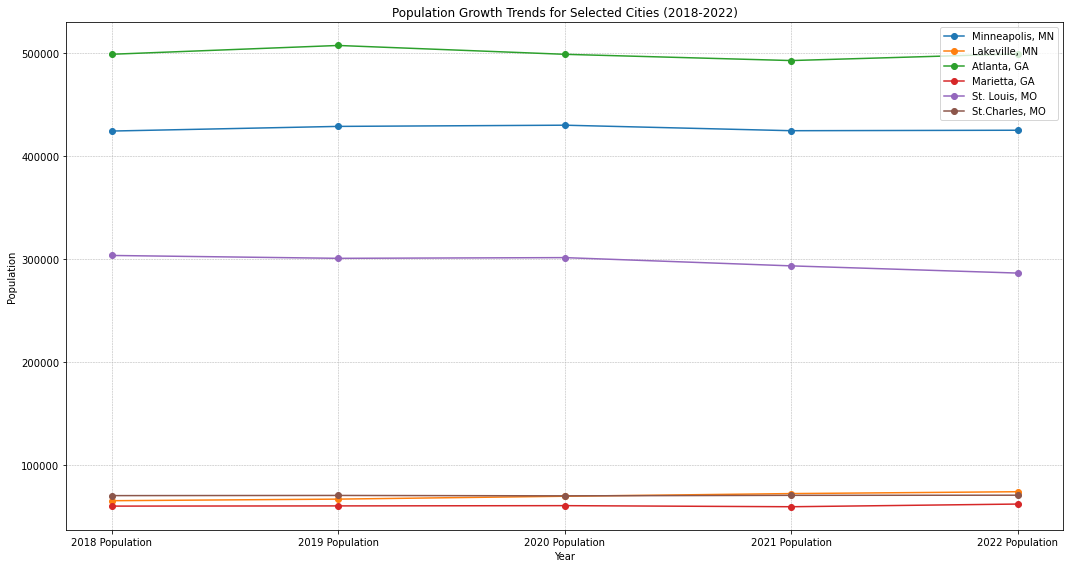

In [59]:
# Defining the subset_cities variable again
subset_cities = population_df['City Name'].unique()[:6]

# Visualizing the population growth trends for the selected cities
plt.figure(figsize=(15, 8))

for city in subset_cities:
    city_data = population_df[population_df['City Name'] == city]
    plt.plot(city_data.columns[3:], city_data.iloc[0, 3:], label=city, marker='o')

plt.title('Population Growth Trends for Selected Cities (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- Minneapolis, MN: The population has shown slight fluctuations over the years. After a small increase from 2018 to 2019, there was a minor decline in the subsequent years, followed by a slight increase in 2022.
- Lakeville, MN The city has exhibited consistent growth each year, suggesting that it's an attractive location for residents.
- Atlanta, GA: The population initially increased from 2018 to 2019. However, there was a decline in the next two years, with a recovery observed in 2022, bringing the population close to its 2018 level.
- Marietta, GA: This city's population remained relatively stable from 2018 to 2019, followed by a slight decline in 2020 and 2021. However, there was a noticeable growth in 2022.
- St. Louis, MO: There's a clear downward trend for St. Louis. The population has consistently declined each year from 2018 to 2022.
- St.Charles: Population has been relatively stable, with minor fluctuations. There was a slight decline from 2018 to 2019, followed by increases in the subsequent years, leading to an overall growth by 2022.

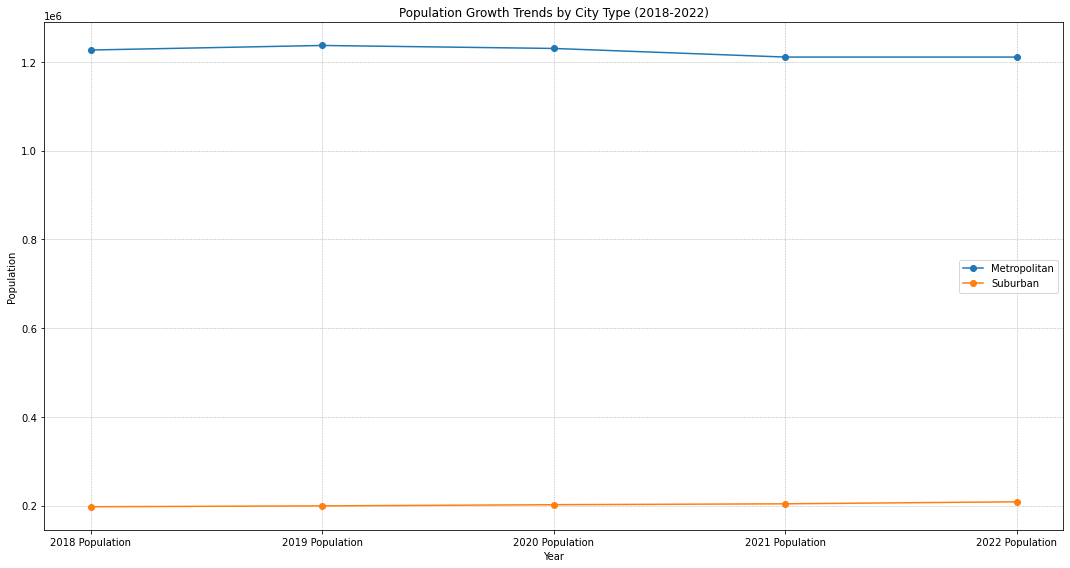

In [56]:
# Aggregating the data by City Type and summing the populations for each year
df_citytype_population = population_df.groupby('City Type').sum()

# Visualizing the population growth trends for each City Type
plt.figure(figsize=(15, 8))

for city_type in df_citytype_population.index:
    plt.plot(df_citytype_population.columns, df_citytype_population.loc[city_type], label=city_type, marker='o')

plt.title('Population Growth Trends by City Type (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- Metropolitan areas have seen a slight fluctuation in population, with a dip in the middle years followed by a recovery in 2022.
- Suburban areas have experienced consistent growth throughout these years.

# Consumer Price

The Consumer Price Index (CPI) is a crucial economic indicator, often used to measure inflation. An increasing CPI indicates rising prices, while a decreasing CPI suggests falling prices.

In [88]:
consumer_price_df = pd.read_csv("CPI Rate.csv")

In [89]:
# Isolating pre-COVID and post-COVID data for Consumer Price
pre_covid_consumer_price_data = consumer_price_df[consumer_price_df['DATE'].str.contains('2018|2019')]
post_covid_consumer_price_data = consumer_price_df[consumer_price_df['DATE'].str.contains('2020|2021|2022|2023')]

# Calculate CPI statistics for pre-COVID and post-COVID periods
pre_covid_cpi_stats = pre_covid_consumer_price_data['USACPALTT01CTGYM'].describe()
post_covid_cpi_stats = post_covid_consumer_price_data['USACPALTT01CTGYM'].describe()

# Combining the statistics for a comparative view
cpi_comparison = pd.concat([pre_covid_cpi_stats, post_covid_cpi_stats], axis=1)
cpi_comparison.columns = ['Pre-COVID', 'Post-COVID']

cpi_comparison

,Pre-COVID,Post-COVID
count,24.000000,44.000000
mean,2.145241,4.577095
std,0.368270,2.792299
min,1.576422,0.051281
25%,1.896712,1.605303
50%,2.094586,4.899186
75%,2.342705,7.021449
max,2.889804,8.968371


An increase in the average CPI post-COVID-19 compared to the pre-COVID period, indicating rising consumer prices during this time.

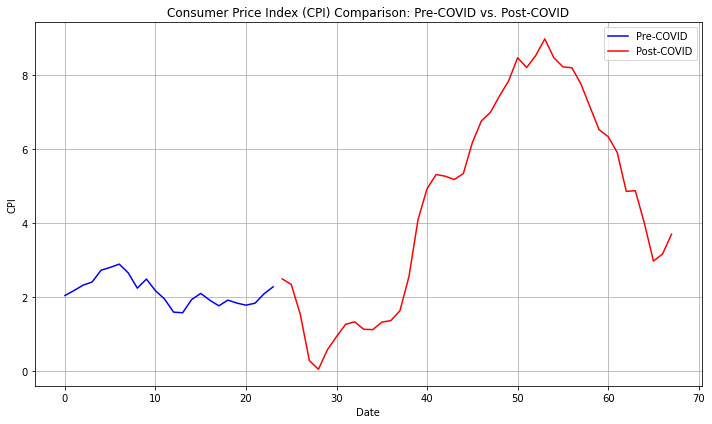

In [90]:
# Visualization for Consumer Price Index (CPI) comparison
plt.figure(figsize=(10, 6))

pre_covid_consumer_price_data['USACPALTT01CTGYM'].plot(label='Pre-COVID', color='blue')
post_covid_consumer_price_data['USACPALTT01CTGYM'].plot(label='Post-COVID', color='red')

plt.title("Consumer Price Index (CPI) Comparison: Pre-COVID vs. Post-COVID")
plt.ylabel("CPI")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Job Opening in Construction 

In [60]:
job_opening_df = pd.read_csv("Job Opening.csv")

In [61]:
job_opening_df.rename(columns={'JTS2300JOL': 'Job Opening Rate'}, inplace=True)

In [62]:
job_opening_df

,DATE,Job Opening Rate
0,2018-01-01,250
1,2018-02-01,218
2,2018-03-01,223
3,2018-04-01,223
4,2018-05-01,266
...,...,...
63,2023-04-01,347
64,2023-05-01,379
65,2023-06-01,386
66,2023-07-01,353


In [63]:
# Isolating pre-COVID and post-COVID data for Job opening
pre_covid_job_opening_data = job_opening_df[job_opening_df['DATE'].str.contains('2018|2019')]
post_covid_job_opening_data = job_opening_df[job_opening_df['DATE'].str.contains('2020|2021|2022|2023')]

# Calculate CPI statistics for pre-COVID and post-COVID periods
pre_covid_job_opening_stats = pre_covid_job_opening_data['Job Opening Rate'].describe()
post_covid_job_opening_stats = post_covid_job_opening_data['Job Opening Rate'].describe()

# Combining the statistics for a comparative view
job_opening_comparison = pd.concat([pre_covid_job_opening_stats, post_covid_job_opening_stats], axis=1)
job_opening_comparison.columns = ['Pre-COVID', 'Post-COVID']

job_opening_comparison

,Pre-COVID,Post-COVID
count,24.000000,44.000000
mean,296.833333,338.545455
std,47.328332,69.042102
min,218.000000,191.000000
25%,270.500000,293.500000
50%,293.000000,347.500000
75%,320.000000,393.000000
max,394.000000,488.000000


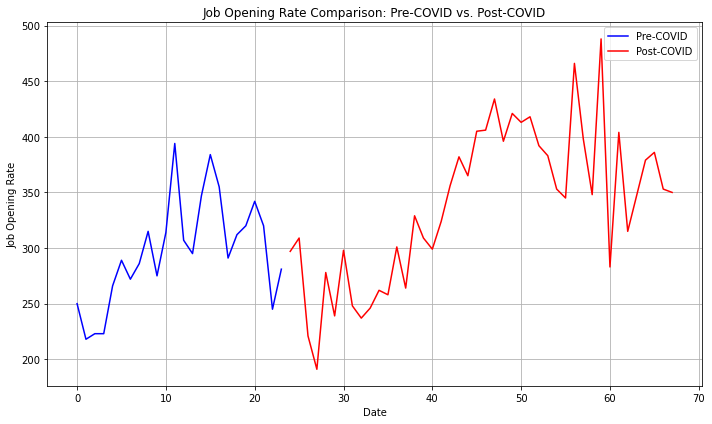

In [64]:
# Visualization for Job Opening comparison
plt.figure(figsize=(10, 6))

pre_covid_job_opening_data['Job Opening Rate'].plot(label='Pre-COVID', color='blue')
post_covid_job_opening_data['Job Opening Rate'].plot(label='Post-COVID', color='red')

plt.title("Job Opening Rate Comparison: Pre-COVID vs. Post-COVID")
plt.ylabel("Job Opening Rate")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Unemployment Rate

In [2]:
unemployee_rate_df = pd.read_csv("Unemployment Rate.csv")

In [3]:
unemployee_rate_df

,DATE,UNRATE
0,2018-01-01,4.0
1,2018-02-01,4.1
2,2018-03-01,4.0
3,2018-04-01,4.0
4,2018-05-01,3.8
...,...,...
64,2023-05-01,3.7
65,2023-06-01,3.6
66,2023-07-01,3.5
67,2023-08-01,3.8


In [5]:
# Isolating pre-COVID and post-COVID data for Consumer Price
pre_covid_unemployee_rate_data = unemployee_rate_df[unemployee_rate_df['DATE'].str.contains('2018|2019')]
post_covid_unemployee_rate_data = unemployee_rate_df[unemployee_rate_df['DATE'].str.contains('2020|2021|2022|2023')]

# Calculate CPI statistics for pre-COVID and post-COVID periods
pre_covid_unemployee_rate_stats = pre_covid_unemployee_rate_data['UNRATE'].describe()
post_covid_unemployee_rate_stats = post_covid_unemployee_rate_data['UNRATE'].describe()

# Combining the statistics for a comparative view
unemployee_rate_comparison = pd.concat([pre_covid_unemployee_rate_stats, post_covid_unemployee_rate_stats], axis=1)
unemployee_rate_comparison.columns = ['Pre-COVID', 'Post-COVID']

unemployee_rate_comparison

,Pre-COVID,Post-COVID
count,24.00000,45.000000
mean,3.78750,5.277778
std,0.16501,2.632566
min,3.50000,3.400000
25%,3.67500,3.600000
50%,3.80000,3.900000
75%,3.92500,6.100000
max,4.10000,14.700000


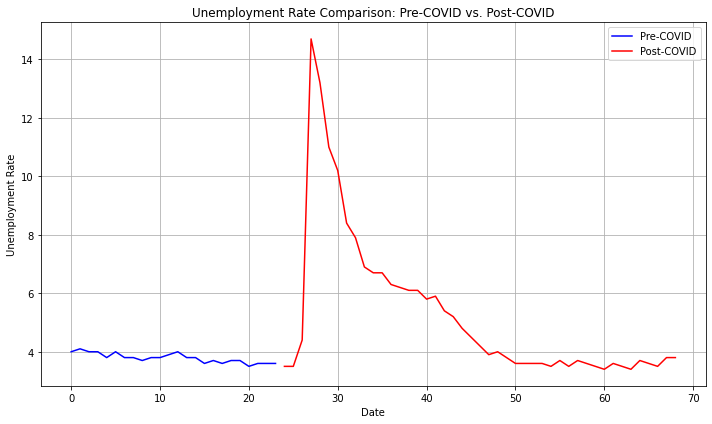

In [20]:
# Visualization for Consumer Price Index (CPI) comparison
plt.figure(figsize=(10, 6))

pre_covid_unemployee_rate_data['UNRATE'].plot(label='Pre-COVID', color='blue')
post_covid_unemployee_rate_data['UNRATE'].plot(label='Post-COVID', color='red')

plt.title("Unemployment Rate Comparison: Pre-COVID vs. Post-COVID")
plt.ylabel("Unemployment Rate")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()